# Title: Software Maintainability Prediction by Applying Machine Learning On Open Source Abandonware

# Abstract

It takes many years to grow a mature open source community, such as the Ruby community.  The majority of contributions come in the form of specialized software packages developed to solve a specific need, and over time, this collection  evolves into a large third party packages ecosystem.  Many popular open source software projects are continuously developed and maintained.  But there are also once popular software components that get abandoned by the authors, leaving people who depend on them in an unexpected situation. The Source code contains all the efforts that went into making the software.  With a typical open source package management system, we can find the source code of all the packages and associated versions.  In this research, We tried to find a way to apply machine learning to the source code change history.  The primary goal of this study was to develop a model for predicting the risk of abandonware.  The secondary objective was to determine the reasons why some software projects are abandoned while others are well-maintained.  This work is based on data obtained from RubyGems.org -- the principal repository of Ruby packages.  Terabytes of Ruby source code has been explored and analyzed. The result of this research might not be deterministic because the scope of this research is limited to source code. The reasons why some authors gave up their open source projects are not always found in the source code.

# ACKNOWLEDGEMENTS

# Introduction

As Jack W. Reeves (1992) pointed out, "the design" of software is the source code itself. All the efforts in making software eventually embody its value via it's working source code. A programming languages like Ruby are distributed in the form of source code. We can find all the version history of open source software projects from a public package management system. This research tries to find a way of applying machine learning to the source code change history in the Ruby package management system in order to make predictions on software maintainability.

## Scope

The scope of this research is limited to the RubyGems.org package management system. There are terabytes of source code stored there. We have created criteria for "abandoned" and "well-maintained" software, and focused the analysis only on packages that fit those criteria. Both the static state of the software project and the change history were analyzed. However, the change history was limited to the versions managed by RubyGems. More complete and detailed change history could be found from the software configuration management system (SCM). However, the SCM was not within the scope of this research.

Simple statistics and machine learning method were applied to the processed data generated from the source code. I also built a prototype software that does all these works. The purpose of the prototype is to proove the concept. It's not intended to become a commercially useable tool. It's not intended to be generalized to other types of source code prediction.


## Problem Statement

I'm trying to ask and find the answers of the following two questions:

1. Why are some open source software projects abandoned by their maintainers?
2. What makes some open source software projects more maintainable than the others?

The exploring of these two questions will be within the scope as mentioned previously.

## Approach

Some data science method are used here. The massive amount of data from open source package management system will be processed, analyzed and then use machine learning methods to find a model/some models. Eventually, this model will be used to predict the chance of being abandoned and maintainability of current open source projects.

A prototype software tool is built to do all the above-mentioned work and prove the concept.

## Outcome

The outcome of this research includes:

* I summarized the discovered difference between abandoned and well-maintained open source projects. The discovery can be useful for people who want to build maintainable software.
* I tried to prove the theory of using software package change history to predict software maintainability.
* The prototype software tool.
* Proccessed and labeled data in the JSON format.

# Background and review of Literature

## Background

Ruby is a popular programming language. It is widely used for development of Web services and infrastructure automation. There is also a large open source ruby community. `RubyGems.org` is the place where most ruby developers release their software packages. Ruby packages are called "gems". At the beginning of 2017, there were about 13908 gems with 1126308 different versions. A lot of software developers are working on their gems all the time. In 2016, there were 44 new gems and 332 new versions of existing gems released per day (Ćilimković, 2017).

With such rich collection of ruby gems, people can do their job much faster. But depending on an open source library  introduces future risks. Some software packages are focused on simple things. They tend to stabilize after a period of active development and do not need much active maintenance subsequently. But most non-trivial software libraries do need ongoing maintenance to address new features, fix bugs, and adjust to new environments. When the developers of a library stop maintaining it, the users who depend on that library often find it very painful.

* There are 1132 Ruby gems stop having any new versions since before 2015, which had been actively maintained for more than ten months before they stopped. We labeled them as "abandoned" gems.
* There are also many Ruby gems that have been maintained actively for a long time with many releases. From software maintainability's perspective, they are at least "maintainable" code some releases back from the recent. We labeled them as "maintained."

There could be different reasons why certain Ruby project stopped, and why some are still continuing. RubyGems.org keeps all the gems versions and most of the gems developers tend to release often. Perhaps we can find a behavioral trace in the releases. Ruby libraries are distributed in the form of source code. If there's a pattern or we can get a model, then we can use it to evaluate Ruby source code or learn how to increase software maintainability.

### On maintainability

Software maintainability is an important factor in the cost of owning a codebase. IEEE defines it as “the ease with which a software system or component can be modified to correct faults, improve the performance or other attributes, or adapt to a changed environment” (IEEE, 1990). Here we will try to define maintainable software from the result of the development activity's perspective. Let's consider a software component in a maintained state at a certain point of time *T*.  If this component continues to be actively maintained to correct faults, improve the performance or other attributes, for a subsequent period *P*, then we can say the state of the software at the time *T* has at least some maintainability. We can also make an assumption that if a software system is not maintained at *T*, it tends to have less maintainability in the future. Especially, it is so when there's evidence based on the software development history before *T* that continuous maintenance is required.

Based on the above assumption, we can label a version of software as "maintainable" or "not maintainable" by analyzing its release history.

### On open source "Abandonware"

Khong (2007) defined abandonware as the copyrighted work that's still owned by the owner, but because the owner ignored the work it is no longer commercially available to the public. One problem caused by abandonware, as pointed out by Khong (2007) is that some software may need continual support from the vendors or producers. Many open source software also fit in the definition of abandonware, that is the source code is still available to the public, but the owner of the project ignores it.

Khong (2007) mentioned, "A related problem of abandonment of computer software is the unavailability
of source codes to correct or modify a computer program." It is no longer the case for open source abandonware. However having the source of origin doesn't solve the problem completely. It still takes the domain knowledge, the knowledge of the software structure, the interest and the effort to maintain the software, which the user of open source software might not have. And the original access point (the library server, the version control system) might still be owned by the original author. Then it's hard to continue the project and share the maintained work with the others.

In my research of the Ruby open source abandonware, I found some have over a hundred open issues on Github. Some people depending on the software are crying for support. Some of the abandonware have tens of pull requests, but the owners just ignore them. One example is the CanCan Ruby gem created by Ryan Bates and first released in 2009 and soon becomes very popular (6000+ stars on Github as of today). It's an enhancement to the Ruby on Rails framework to support authorization. As it's intended to be part of the framework, projects depending on CanCan tend to have a tight coupling with it. When in 2013 the project suddenly stopped all development activity on Github, it became a big problem. We can see now the CanCan project has more than eight hundred forks. Some people chose to take the source code and maintain it by themselves. Eventually, some people formed the "CanCanCan Community" and continue the "CanCan" project under the name of "CanCanCan" (https://github.com/CanCanCommunity/cancancan).

Abandonware doesn't always indicate unmaintainable software. For example, "why the lucky stiff" (2017) is the nickname of a Ruby programmer who was considered one of the best Ruby programmers in the world (Spolsky 2005). He mythically disappeared since 2009. It's probably not right to call his legacy "unmaintainable."

## Literature Review

Riaz, Mendes,& Tempero (2009) had a systematic review of software maintainability prediction and metrics. They found that the commonly used maintainability prediction models were based on algorithmic techniques. And the method could be particular with some maintenance type. Size, complexity and coupling, all these are collected at source code level only. There's a lack of accuracy measures and cross-validation. They also found that expert judgment plays an important role when designing these metrics.

Riaz et al. (2009) suggested the creation of more robust and reliable software maintainability prediction models. It is what I'm trying to achieve by this research. In my prediction model, although the underlying data is also mostly from source code, I put them in time scale and combined several tools' result to avoid prejudice. I intended to use machine learning mechanism to prevent expert opinion.

Beller, Bholanath, McIntosh, & Zaidman (2016) made a research on the usage of Automated Static Analysis Tools (ASATs). In their study, they found that 60% of the most popular open source projects use ASATs, although not embed them as part of their workflow. It might bias my data a bit, as some of the popular projects used ASAT, therefore the analyzing result has been optimized towards certain tool already. But I'm confident that it won't have a big impact. Because in my research, I only take code older than 2015. All the three tools I used has tons of new features since 2015.

My open source Static Analyzer "lizard" has been used in many large projects, including the ATLAS project at CERN (Kluth, et al. 2016). The ATLAS Experiment (Anelli et al. 2008) use lizard to get the cyclomatic complexity metrics in their C++ and Python code. Lizard also supports many other programming languages including Ruby.

I use the countings of automatically detected "code smells" as part of the data I extract from source code. Code smells, as Fowler & Beck (1999) defined as symptoms of poor design and implementation choices. They are the anti-patterns. As a result, code smells will affect the maintainability of software. Tufano, Palomba, Bavota, Oliveto, Di Penta, De Lucia & Poshyvanyk (2015) in their study of when code becomes to smell found that "Code artifacts becoming smelly as consequence of maintenance and evolution activities are characterized by peculiar metrics’ trends." A similar conclusion was achieved by the work of Lozano (2009). Palomba, Bavota, Di Penta, Oliveto, De Lucia, & Poshyvanyk (2013) used the change history of source code to detect code smells, similar to the work by Rapu et al (2004). These papers give me both hope and method when building maintainability prediction model by using machine learning. 

Moser, Pedrycz & Succi (2008)'s research strongly endorsed using change data of source code to build defect predictors. The change data and process-related metrics contain more information.

Data mining the software code change history has been a hot research topic (Ying et al. 2004) (Zimmermann et al. 2005) (Hassan, 2006, 2008). Palomba has several researches works across mining code change history and code smells (Palomba et al. 2015) (Palomba et al. 2013) (Tufano, Palomba et al .2015). However, the above-mentioned researches haven't applied machine learning technique on code change history.

There's also existing research applying machine learning on change history. Elish, Aljamaan, & Ahmad (2015) compared three empirical studies on predicting software maintainability using ensemble methods. Their work turned out to be extremely useful when I'm doing this research.

Inspired by Lohn (2016)'s keynote speak at a Python Conference, I will also try to apply fractal dimension metrics on the code change history. Fractal dimension is a complexity ratio showing how detail in a pattern changes with the scale at which it is measured.(Mandelbrot 1967). One of Lohn (2016)'s example is to apply fractal dimension on the Fixfox crash report. The stack trace in the report can be regarded as a sequence of offsets in the computer memory. By getting the fractal dimension metrics of these sequences, Lohn claimed that sometimes he found seemingly unrated software bugs with similar fractal dimension to have the same cause.

## Theory

**Assumption 1**: We can derive a useful model when applying machine-learning to a large variety of metrics generated from the source code of a vast number of open source projects. These projects are labeled as abandoned, and well-maintained. This model can be used to predict the probability of becoming abandonware for other software projects.

**Assumption 2** The prediction model will improve in accuracy when using change history rather than a static view of one version of the software. I assume the change data and process-related metrics contain more information about the defect distribution in software than the source code itself (Moser 2008).

**Prototype software** A prototype software is built to implement and verify the assumptions. The software project is hosted at https://github.com/terryyin/rubygem_digger under the MIT License (Rosen 2005).

Hayes (2014)'s data science process model divides the process into raw data collection, data processing, data cleaning, exploratory data analysis (EDA), machine learning and the final data product. In my prototype software, each part may be built with a different programming language.

The raw data collection, data processing, and data clear=ning part are built using the Ruby programming language. Choosing Ruby is because of the subject being studied is RubyGems. It's easier to use the same programming language to extract information. Another reason for choosing Ruby is the Ruby on Rails web service framework (Bächle & Kirchberg 2007). Because of the heavy load of computing resource needed for the job, I built a simple distributed computing system using Ruby on Rails.

The exploratory data analysis (EDA), machine learning and the final data product is developed with the Python programming language. The reason for choosing Python is because it's rich toolboxes of big data and machine learning libraries. I mainly use the Scikit-learn library (Pedregosa, et al 2011) for this job. Another reason for using Python is the Jupyter platform (Kluyver et al. 2016). Jupyter is an interactive platform to create reproducible computational workflows. Jupyter is implemented in Python and has splendid support for using Python in it. Scikit-learn library works perfectly in Jupyter. Jupyter is a nearly perfect EDA platform for me.

Numpy, Pandas and Matplotlib are used in the EDA process. The Python code that imports these libraries is:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

The Python code that imports Scikit-learn library:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import binarize
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Terms

**Data science process** When doing the research, I use the data science process defined by Hayes (2014). It includes: raw data collection, data processing, data cleaning, exploratory data analysis (EDA), machine learning and build data product.

![](process.png)

**Ruby programming language** is a programming language designed by Matsumoto (2002) in the mid-1990s.

**Ruby on Rails** is a web application framework implemented in Ruby (Bächle et al. 2007)

**Python programming language** is a programming language designed by Van Rossum (2007). It's widely used in data science. It has many open software tools to support data processing tasks and machine learning.

**Code Smells** are the symptoms of poor design and implementation choices (Fowler et al. 1999).

**Software Metrics**:

* **NLOC**, The net length of source code, is the lines of source code excluding the comments and empty lines. (Gilb 977)
* **Cyclomatic Complexity**: is a measurement of how complicated a software routine is (McCabe 1976). It measures  the number of linearly-independent paths is the source code. It's typically applied on the funtion/method level. I will use CCN for Cyclomatic Complexity Number.

**RubyGems terms**

To avoid confusion, I used the following terms when describing a software package on RubyGems

* A **Gem** is a software project hosted by RubyGems.org. It has a unique name and may have multiple versions.
* A **version** is one snapshot of the code that has a version number. We will sometimes also call it a "**Release**"
* A **package** the cohesive data related to one version of a gem. It includes the specification and all the code. One thing needs to be emphasized is a package's file extension is `.gem`.




# Analysis and Design

## The working process

I use the data science process defined by Hayes (2014) and tailed it to my own process.
![](myprocess.png)

The steps are:

1. *Ruby gem with versions*: Mirror all the packages from RubyGems.org, create the software tool to get the collections information and extract source code for any package.
2. *Find gems that can be labeled as abandoned or well-maintained*: It includes refining the criteria.
3. *Analyze code*: is to generate analysis data from the labeled Ruby gems. It includes both the last version of observation and historical versions.
4. *Machine learning* is to use machine learning tools to select and build a classifying model. Unlike the prior steps, this step and the following step will be done with the Python programming language. (The previous ones are in Ruby, for the convenience of working with Ruby gems.)
5. *Regression and model evaluation* is the fine tune the classifier and select features.
6. *Evaluate popular Ruby projects* is to build a usable software tool and use it to predict the likelihood of Being abandoned.

## The software structure

### The data processor

The avoid repeated work, interim data are cached with versions. This is a general ability needed by several different types of data. Below is an UML class diagram of the prototype software.

![](uml.png)

This class diagram uses the UML notions define by Larman (2012).

* The `Digger` class defines the process of "digging" the source code. It includes a spec for the digging and several `Step`s for the digging work.
* The `Step`s are defined with a common `Step` super class, which is cacheable. So if a step has been done previously and the spec from the `Digger` didn't change, it will just use the cached data instead of recalculating everything. `Step`s ask the `GemSpecs` to do the real work.
* `GemSpecs` is the collection of all the gems found in the RubyGems mirror and all the versions information. It includes tens of thousands ruby Gems, which we use the `GemWithHistory` to represent.
* `GemWithHistory` represents a gem, and it's history. So it's not just one software package but a list of software packages with different versions.
* `PackageWrapper` represents the package, which is the basic unit in the RubyGems library. Source code can be extracted out of a package. The `PackageWrapper` knows how to get raw analysis data from the third-party static analysis tools. It also knows how to collection extra information from Github.com, if the package indicates its homepage is a github.com link.
* `Dispatcher` and its `Client` are RESTful API implemented in Ruby on Rails. The `Dispatcher` talks to the `Digger` to see which packages need to be analyzed, then store that information in its `WorkingItems` database. 
* When the `Client` requires a work from the `Dispatcher`, the `Dispatcher` will get a work from the `WorkingItems`, if there is any. The `Client`s, which are located on many physical machines will use the same library to do the analysis and submit to the `Dispatcher` when it's done.
* `Dispatcher` will test with the `Digger` to see if there's any more work needed. if there's no more, `Digger` will dump the data to a file in JSON format for further analysis.

The data flows like the figure below.

![](flow.png)

### EDA and Machine Learning

EDA and machine learning are done using the Python programming language with the Jupyter platform and sk-learn library. It includes:

* Data importer to import the data from JSON file.
* Simply analysis to get the mean, standard deviation, max and min.
* A framework to evaluation different EDA models.
* A tool to apply the result to do prediction.

# Implementation

## Collecting the raw data

RubyGems is a package-management system for Ruby applications and libraries (Berube 2007). A "gem" is the Ruby application or library being managed. RubyGems.org is an instance of such a system and is the biggest host for open source Ruby gems. After installed Ruby, a simple command will down and unpack the Ruby gem of a certain version from the remote server (by default RubyGems.org):

    gem unpack <gem name> -v<gem version>
    
But given the network and service speed, it would be impractical to fetch the gems from RubyGems.org. The entire RubyGems.org database can be mirrored using open source tool (https://github.com/rubygems/rubygems-mirror). The whole database is around 300GB as of the beginning of 2017. It will extract to about 1.4TB Ruby source code, and that's about twenty billion lines of code. Then using the Ruby Gem library (https://github.com/rubygems/gems), we can get all the gems specification and unpack the packages when needed.

### Versions simplification

To simplify and normalize the data, I keep only one last version for a gem in a month, if there are multiple versions in that month.

After this simplification, I made the assumption that a gem has more than 10 months with versions means they are the kind of software that needs continuous updates.

### Labeling the data

A gem will be labeled as "abandoned" if it:

* Has more than `maintained_months` months with new versions
* Has no new releases for two years
* Has more than `min_nloc` NLOC in its last version

A gem will be labeled as "maintained" if it:

* Has more than `well_maintained_months` months with new versions
* Has more than `min_nloc` NLOC in its last version

`well_maintained_months` (20 ~ 32) is a much large number than `maintained_month` (10 ~ 20). 

### Remove recent months for "well maintained" gems

For the data that's labeled as `maintained`, I remove the last 15 months because we don't know what will happen to them next, but 15 months ago they are "maintainable" software as they have been maintained for at least another 15 months.

### Complicated enough

To reduce the irregular data, I removed the gems that have less than a certain number of NLOC.

Different specifications are used to label data.

| index | description | min. months | min. NLOC | Well maintained | Hist. months | ignored recent months |
|---|---|---|---|---|---|---|
| 1| most data| 10| 2000| 20| 20| 10|
| 2| less months| 10| 2000| 20| 12| 12|
| 4| more code| 10| 5000| 20| 20| 10|
| 5| long maintained but stopped| 15| 2000| 20| 20| 10|
| 7| longer maintained for good| 12| 2000| 30| 15| 15|
| 8| balanced| 15| 3000| 30| 10| 15|

It's still quite objective to define what an "abandonware" and "well maintained" Ruby gem is. I will compare the result generated by different labeling specifications.

### Manual confirmation

Using labeling specification index 1, out of 387 stopped and complicated enough gems 199 listed their Github URL as the homepage for the gem. A lot of the others also use Github as their version control system but have another web page as homepage. Among these gems, 80 of them have open issues on Github after the last version was released, which means there are still need not fulfilled for these gems. But they stopped.

Here's an incomplete list for gems having at least ten open issues on Github after the last version was released.

| Index | Gem | Open Issues | Years stopped | URL | Possible Reason For Stopping |
|---|---|---|---|---|---|
| 1 | axlsx | 131 | 3.4 | https://github.com/randym/axlsx | Still actively being developed, but having too many open issues and pull requests. |
| 2 | cancan | 205 | 3.7 | https://github.com/ryanb/cancan | Became very popular when released in 2009 but the author stopp all development activity in 2013. To keep the gem going, the community forked it and created CanCanCan (https://github.com/CanCanCommunity/cancancan). |
| 3 | chronic | 99 | 3.4 | https://github.com/mojombo/chronic | Nearly no development activity for 3 years. |
| 4 | fakeweb | 30 | 6.4 | https://github.com/chrisk/fakeweb | Just stopped. |
| 5 | fnordmetric | 96 | 3.6 | https://github.com/paulasmuth/fnordmetric | Just stopped. Having over 400 forks but only 6 pull requests. |
| 6 | i18n | 29 | 2.1 | https://github.com/svenfuchs/i18n | Wrong label. Stable popular component. Will have a new release soon. |
| 7 | jsduck | 81 | 3.3 | https://github.com/senchalabs/jsduck | Little development activity. |
| 8 | ooor | 22 | 3.7 | https://github.com/akretion/ooor | Still maintained (38 commits in 2016). But somehow no new release. |
| 9 | redcar | 20 | 5.0 | https://github.com/danlucraft/redcar | Just stopped. |
| 10 | surveyor | 32 | 3.8 | https://github.com/NUBIC/surveyor | Just stopped. |
| 11 | taps | 63 | 4.7 | https://github.com/ricardochimal/taps | Just stopped. |
| 12 | veewee | 86 | 2.3 | https://github.com/jedi4ever/veewee | Code still maintained with about 20 commits each year. With over 800 forks. |
| 13 | webrat | 22 | 6.1 | https://github.com/brynary/webrat | Just stopped. |
| 14 | youtube_it | 22 | 2.5 | https://github.com/kylejginavan/youtube_it | Just stopped. |

Most of the above 14 gems I checked manually stopped in a way that will surprise an outsider who depends on the gem. With below exceptions:

* `i18n` is mistakenly marked as *bad*. It has a new release (January 31, 2017) right after I mirror the RubyGems. It provides internationalization support for Ruby since 2008.
* `axlsx`, `ooor` and `veewee` still have some maintenance activity on their Github repositories. But they have published any new release for more than two years, and people have to fork their code to make changes.

After manually check 14 gems, I found 11 of them just stopped in a surprising way, 3 of them still have development activities but stop making any new versions despite the many open issues.

## Getting the Static Code Analysis

Static code analyzers generate the basic building blocks for the processed data.

Before making any judgment regarding the usefulness of the metrics, I try to collect as many of them as possible. The efficiency will be check when later doing the simple statistics and machine learning. The conclusions can be found in the part On Static Code Analyzing.

Three open source software tools are employed for the static code analyzing. They are Lizard, RuboCop and Reek.

**Lizard** (Kluth, et al. 2016) is an open source static code analyzer mostly does cyclomatic complexity counting. It supports a large number of different programming languages including Ruby. It also has easy to use interface to extend its analyzing features. As I am the main author and owner of the lizard project, a new requirement can be added to lizard when needed without waiting.

**RuboCop** (Batsov, 2012) is a Ruby static code analyzer. It reports a large variety of potentially code problems but mostly focuses on coding styles. It's hard to prevent a static code analyzer focusing on coding styles to be opinionated. RuboCop is so opinionated that it even has a `-a` option to automatically 'correct' some of the problems it discovers. My hope for RuboCop wasn't high when getting it involved. As mentioned above, I just wanted to get as much metrics as possible without judgment. But the result surprised me.

**Reek** is a code smell detector for Ruby by Rößner (2008). Ruby is a dynamic-typed programming language (Paulson 2007). It is not as easy to get the meaning behind the code by a static analyzer as a static-typed language like Java. A side effect of this research is to evaluate the efficiency of Reek in discovering meaningful code smells.

### Distributed Computing

There are twenty billion lines of code in the RubyGems database. After removing the less frequently updated gems, taking only one version per month and remove the unwanted months, there are still nearly a billion lines of code to be scanned by the static analyzers. It will take days to proceed one round of computing, and an update to the static analyzing configuration might need to go through the process several times. In fact, as I'm doing the EDA, I had to run through the process tens of times to retrieve new data and fix bugs.

A simple client/server style distributed computing system has been developed to accelerate the computing using Ruby on Rails.

### Output of the data processing and cleaning

The processed data will be put to a JSON file that contains the spec for labeling, information about every gem including its label, version and all the metrics from the static analyzers.

For each labeling spec, two JSON files will be generated. One contains only the last version of the gem; the other contains multiple versions. The first one is used to do machine learning on static data; the latter one is for mining the dynamic data. To load the first JSON file:

In [54]:
from learner2 import RubygemLearner, Trainer
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--1.data.json'
with open(fn) as f: data = json.load(f)
simple_analysis = data["simple_analysis"]
keys = simple_analysis.keys()
d = data["data"]

learner = RubygemLearner(fn)

Then fix the column names for later use.

In [4]:
df = pd.io.json.json_normalize(d)

old_new_cols = {}
for name in df.columns:
    if name.startswith('stat'):
        old_new_cols[name] = name.split('.')[1]

df.rename(columns=old_new_cols, inplace=True)
df.head()

,label,name,Attribute,BooleanParameter,ClassVariable,ControlParameter,DataClump,DuplicateMethodCall,FeatureEnvy,InstanceVariableAssumption,...,metrics_perceivedcomplexity,nloc,nloc_rate,performance_,reek_total,security_,style_,total,warning_count,version
0,maintained,actionwebservice,4.284949,0.357079,0.000000,1.785395,1.249777,36.779147,7.498661,7.855740,...,1.249777,5601,0.24,0.535619,164.792001,0.000000,62.131762,0.714158,6.248884,1.2.6
1,maintained,active_metadata,3.319109,1.422475,0.474158,0.948317,0.000000,23.233760,2.844950,6.638217,...,0.948317,2109,0.03,0.000000,83.451873,2.370792,84.400190,3.319109,1.422475,0.8.9
2,maintained,acts_as_ferret,2.336449,1.298027,1.817238,1.038422,0.778816,100.467290,7.268951,6.230530,...,1.557632,3852,0.12,0.259605,218.068536,0.259605,84.112150,0.000000,4.932503,0.5.4
3,maintained,adapi,4.763099,1.504136,0.501379,1.504136,0.000000,21.308599,1.754826,4.011030,...,2.256205,3989,0.47,0.250689,68.187516,0.501379,61.920281,1.504136,5.264477,0.2.0
4,maintained,adaptation,2.103492,0.000000,0.841397,2.103492,1.262095,38.283551,9.255364,4.206984,...,3.786285,2377,0.28,3.365587,161.968868,3.365587,121.161127,3.365587,8.834666,1.0.1


All the metrics are listed as below.

In [5]:
reek_columns =[
 'Attribute','BooleanParameter','ClassVariable','ControlParameter',
 'DataClump','DuplicateMethodCall','FeatureEnvy','InstanceVariableAssumption',
 'IrresponsibleModule','LongParameterList','LongYieldList',
 'ManualDispatch','ModuleInitialize','NestedIterators','NilCheck',
 'PrimaDonnaMethod','RepeatedConditional','SubclassedFromCoreClass',
 'TooManyConstants','TooManyInstanceVariables','TooManyMethods',
 'TooManyStatements','UncommunicativeMethodName','UncommunicativeModuleName',
 'UncommunicativeParameterName','UncommunicativeVariableName',
 'UnusedParameters','UtilityFunction',
 'reek_total'  # the total number of all reek warnings per KNLOC
]
lizard_columns = [
 'avg_ccn',        # average cyclomatic complexity number
 'avg_nloc',       # average NLOC per function
 'avg_token',      # average number of token per function
 'fun_count',
 'fun_rate',       # percentage of functions that are considered complicated
 'warning_count',  # warning count per KNLOC
]

rubocop_columns = [
 'style_',               # the sum of all coding style warnings per KNLOC.
                         #    there are about 200 different style warnings
 'lint_',                # the sum of all lint warnings per KNLOC
 'lint_duplicate',
 'metrics_',             # the sum of all metrics warnings per KNLOC
 'metrics_abcsize','metrics_blocklength','metrics_blocknesting',
 'metrics_classlength','metrics_cyclomaticcomplexity','metrics_linelength',
 'metrics_methodlength','metrics_modulelength','metrics_parameterlists',
 'metrics_perceivedcomplexity',
 'total',                # the total number of all rubocop warnings per KNLOC
 ]

## Simple Statistics

After getting the labeled data, I did some simple statistics to see if I can get some low hanging fruits. So I compared the mean and standard deviation of all the metrics. All countings are transformed to density per KNLOC to make the data comparable. At this point, the "maintained" data already excluded the most recent 10 to 18 months, which indicates that they are really "maintainable." And the simple statistics are done on the metrics got from the latest version in our data collection.

From Appendix B we can see that the 'maintained' average metrics are better than the 'abandoned' in almost all the areas. It indicates at least some sanity in the labeling. But the standard deviation of most of the metrics makes it hard to make any sense using the singular metrics.

I developed a simple method to calculate the error rate of each field alone:

In [48]:
def error_rate(field):
    return  - abs(improved_rate(field)) /average_stddev_percent(field)

def improved_rate(field):
    return (field["abandoned"]["avg"] - field["maintained"]["avg"]) * 100 / field["maintained"]["avg"]
def stddev_percent(data):
    return data["stddev"] * 100 / data["avg"]
def average_stddev_percent(field):
    return (stddev_percent(field["maintained"]) + stddev_percent(field["abandoned"])) / 2

Then use the `error_rate` function to get the top 10 metrics:

In [49]:
def print_label(name, f):
    print("   %s:\tavg: %6.3f\tstddev: %6.3f\tstddev percent:%6.1f%%" %(name, f[name]["avg"], f[name]["stddev"], stddev_percent(f[name])))
    
impacts = {k: error_rate(simple_analysis[k]) for k in keys}
for key in (sorted(impacts.items(), key=lambda x: x[1]))[:10]:
    k = key[0]
    f = simple_analysis[k]
    print("Metrics: %s\tImprovement:%6.1f%%\tError rate:%6.1f%%" % (key[0],improved_rate(f), key[1]))
    for name in ('maintained', 'abandoned', 'with_issues'):
        print_label(name, f)


Metrics: style_	Improvement:  24.8%	Error rate:  -0.5%
   maintained:	avg: 48.401	stddev: 26.349	stddev percent:  54.4%
   abandoned:	avg: 60.395	stddev: 28.462	stddev percent:  47.1%
   with_issues:	avg: 56.487	stddev: 30.394	stddev percent:  53.8%
Metrics: lint_	Improvement:  26.6%	Error rate:  -0.5%
   maintained:	avg:  6.688	stddev:  4.296	stddev percent:  64.2%
   abandoned:	avg:  8.467	stddev:  4.570	stddev percent:  54.0%
   with_issues:	avg:  6.913	stddev:  3.918	stddev percent:  56.7%
Metrics: metrics_	Improvement:  20.1%	Error rate:  -0.3%
   maintained:	avg:  6.766	stddev:  4.183	stddev percent:  61.8%
   abandoned:	avg:  8.123	stddev:  4.529	stddev percent:  55.8%
   with_issues:	avg:  7.851	stddev:  5.327	stddev percent:  67.8%
Metrics: lint_duplicate	Improvement:  77.8%	Error rate:  -0.3%
   maintained:	avg:  0.070	stddev:  0.184	stddev percent: 264.7%
   abandoned:	avg:  0.124	stddev:  0.263	stddev percent: 212.7%
   with_issues:	avg:  0.055	stddev:  0.103	stddev percent

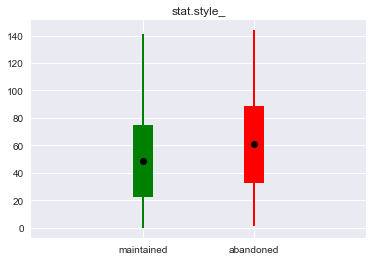

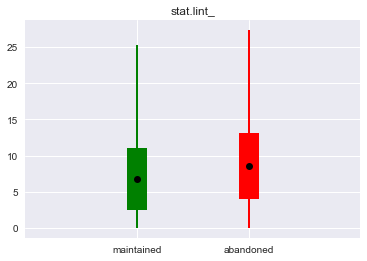

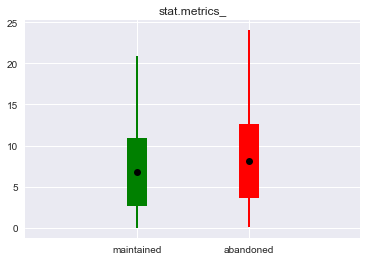

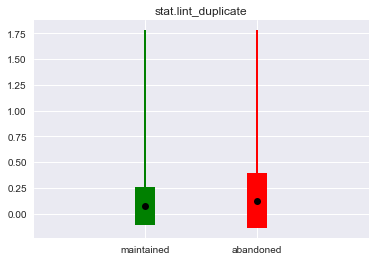

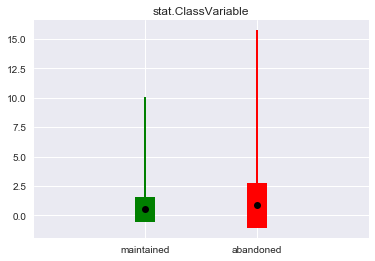

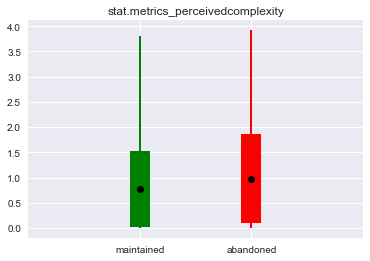

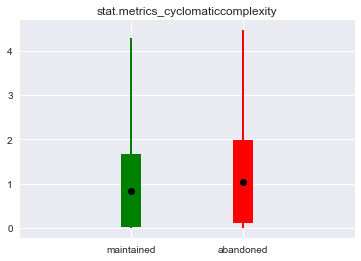

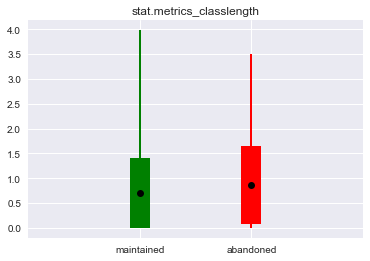

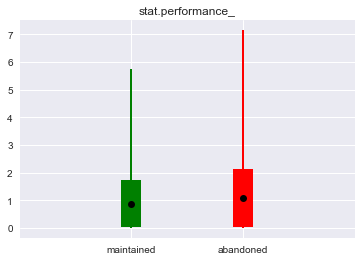

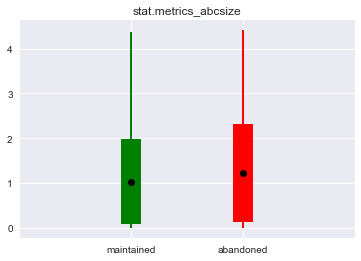

In [51]:
import json
fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--1.data.json'
with open(fn) as f: data = json.load(f)
simple_analysis = data["simple_analysis"]
keys = simple_analysis.keys()
d = data["data"]

df = pd.io.json.json_normalize(d)
df = df[df["stat.avg_nloc"]<20]
abdf = df[df["label"]=="abandoned"]
mtdf = df[df["label"]=="maintained"]
x = np.random.randn(100, 2)
field = 'stat.style_'
for k in (sorted(impacts.items(), key=lambda x: x[1]))[:10]:
    field='stat.'+k[0]
    plt.figure(field)
    plt.title(field)
    means = np.array([mtdf[field].mean(), abdf[field].mean()])
    maxes = np.array([mtdf[field].max(), abdf[field].max()])
    mins = np.array([mtdf[field].min(), abdf[field].min()])
    std = np.array([mtdf[field].std(), abdf[field].std()])
    plt.xticks(np.arange(2), ['maintained', 'abandoned'])


    # create stacked errorbars:
    plt.errorbar(np.arange(2), means, std, fmt='ok', ecolor=['green', 'red'], lw=20)
    plt.errorbar(np.arange(2), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=['green','red'], lw=2)
    plt.xlim(-1, 2)

To my surprise, `style_` is top in the list. `style_` is the sum of all coding style finding from RuboCop. The abandoned ones have 25% more coding style warnings from RuboCop than the well-maintained ones. The 50% standard deviation is relatively still small.

By this standard, the second biggest single factor is `avg_ccn`, which is the average cyclomatic complexity per function. RuboCop's `metrics_perceivedcomplexity` and `metrics_cyclomaticcomplexity` are also in the top ten metrics, but both have 68% error rate. It probably because the default configuration for cyclomatic complexity in RuboCop is still too high, which is 7 for perceived complexity and 6 for cyclomatic complexity.

Reek doesn't perform very well except `reek_total` which is the total number of Reek warnings per KNLOC. One of the Reek metrics that seems to make an impact is `DuplicateMethodCall`, which has 69% error rate. As Martin (2009) famously said: "duplication is perhaps the root cause of all evils in software." Reek seems to perform really well with the particular collection that is abandoned and still having issues on Github.

The above result might suffer from the accuracy of the labeling if we want to approximate "long time abandoned" software to "unmaintainable" software. Below are the comparison when using different labeling specs.

When using different labeling specification, the results are slightly different, as listed below. But the maintained ones are consistently better than the abandon ones, with an exception for `Reek Total` with spec 4.

| Spec Index | Style | Avg CCN | Lint | Metrics | Reek Total |
|---|---|---:|---:|---:|----:|----:|
|1| 48.4/60.4 | 1.76/1.81 | 6.69/8.46 | 6.77/8.12 | 101/110 |
|3| 48.8/61.0 | 1.79.1.81 | 6.75/8.62 | 6.74/8.25 | 104/111 |
|4| 31.3/35.7 | 1.76/1.79 | 4.43/5.37 | 3.88/3.95 | 102/100 |
|5| 43.3/58.8 | 1.80/1.85 | 5.86/8.18 | 5.81/7.80 | 103/111 |
|7| 47.0/60.0 | 1.81/1.81 | 65.3/84.0 | 6.40/8.20 | 106/111 |
|8| 40.2/45.6 | 18.1/18.5 | 57.4/62.6 | 5.23/5.40 | 104/109 |

### Machine Learning for code metrics without change history

Next is to feed the data to machine learning tools. The source code is listed in Appendix C.
By using only the latest version in our collection, we can do apply machine learning to the static state of the software code. The JSON file name begins with `RubygemDigger--Steps--GenerateJsonForLastVersions--` is the one record per gem data file.

In [57]:
fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--1.data.json'
learner = RubygemLearner(fn)
trainer = Trainer(learner)

#### Classify using kNN

I first tried the k-nearest neighbors algorithm (Shakhnarovich 2006) with the `KNeighborsClassifier` class from scikit-learn.

/Users/terry/git/rubygem_digger/notebook/learner2.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df[df['name']==name][df['label']==label][self.learner.features]


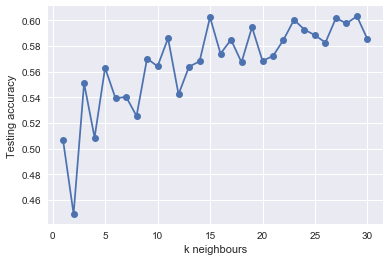

In [56]:
nb_range = np.arange(1, 31)
a_scores = []

for nb in nb_range:
    model = KNeighborsClassifier(n_neighbors=nb)
    a_scores.append(trainer.train_and_test(model))
    
plt.plot(nb_range, a_scores, 'o-')
plt.ylabel('Testing accuracy')
plt.xlabel('k neighbours')

#### More Algorithms

The acuracy result is not getting a lot better with kNN. The best it can get is around 60%. I moved on to try multiple machine learning method provided by scikit-learn. Including:

| index | Learning Algorithm |
|---|---|
|AG1 |    LogisticRegression |
| AG2 |    DecisionTreeClassifier |
| AG3|    BaggingClassifier with DecisionTreeRegressor |
| AG4|    BaggingClassifier with LogisticRegression |
| AG5|    BaggingClassifier with KNeighborsClassifier |
| AG6|    RandomForestClassifier with n_estimators=20 |
| AG7|    AdaBoostClassifier with n_estimators=100 |
| AG8|    GradientBoostingClassifier with n_estimators=100 |
| AG9|    LinearSVC |
| AG10|    MLPClassifier |


| | AG1 | AG2 | AG3 | AG4 | AG5 | AG6 | AG7 | AG8 | AG9 | AG10 | Average |
|--|--|--|--|--|--|--|--|--|--|--|
| Spec 1| 0.618| 0.552| 0.614| 0.613| 0.575| 0.609| 0.614| 0.601| 0.616| 0.626| 0.604 |
| Spec 3| 0.622| 0.590| 0.584| 0.617| 0.585| 0.612| 0.620| 0.599| 0.630| 0.611| 0.607 |
| Spec 4| 0.622| 0.568| 0.589| 0.625| 0.590| 0.609| 0.610| 0.594| 0.607| 0.580| 0.599 |
| Spec 5| 0.617| 0.554| 0.581| 0.615| 0.595| 0.623| 0.611| 0.585| 0.632| 0.602| 0.601 |
| Spec 7| 0.611| 0.556| 0.600| 0.620| 0.606| 0.603| 0.604| 0.606| 0.612| 0.610| 0.603 |
| Spec 8| 0.626| 0.551| 0.583| 0.616| 0.575| 0.608| 0.599| 0.607| 0.603| 0.591| 0.596 |
| **Average** | 0.619| 0.562| 0.592| 0.618| 0.588| 0.611| 0.610| 0.599| 0.617| 0.603| **0.602** |

The result shows that no combination of labeling specification and algorithm can make a good enough accuracy rate. The decision tree classifier seems not fit the problem worst.


### Machine Learning for code metrics with change history

While the first result of machine learning is not satisfactory, I moved on to try if mining the data using a dynamic view can improve the effort (Moser 2008).

A reasonable solution will be choosing a sequence labeling algorithm (Nguyen et al. 2007). However, I decided to begin with something simpler. I used the same algorithm as with the code metrics without change history, with some additional data fields and enhanced prediction method.

Assume the last version of a gem has the metrics: `V(0) = {v(0).m1, v(0).m2 ... v(0).mn}`,<br>
and a version of the gem `x` month ago has: `V(-x) = {v(-x).m1, v(-x).m2 ... v(-x).mn}`,<br>
then we can have a record for that version including `{V(-x), V(0) - V(-x), age: x}` and give it the same label as `V(0)`. It indicates that a version of gem has the metrics `V(-x)` after `x` months of maintenance it gained `V(0) - V(-x)`, then became abandoned or still maintained.

![](data.png)

The ensemble technique employed here is bagging, as proposed by Elish et al. (2015). Bagging is a short name for bootstrap aggregating (Breiman 1996)

| Model | Lizard | RuboCop | Reek | All but no delta | Altogether |
|---|---:|---:|---:|---:|---:|
| LogisticRegression() | 0.655 | 0.645 | 0.649 | 0.653 | 0.650 |
| kNN | 0.623 | 0.615 | 0.631 | 0.623 | 0.614 |
| ensemble_bagging_with(DecisionTreeRegressor()) | 0.595 | 0.673 | 0.560 | 0.589 | 0.573 |
| ensemble with kNN | 0.673 | 0.672 | 0.673 | 0.672 | 0.670 |
| ensemble wigh LR | 0.674 | 0.672 | 0.679 | 0.670 | 0.659 |

A trap here is that the data is quite redundant. Metrics do not change very much every month and the data for each month is not too different. When using random train/test splitting, the training set and the testing set still have quite redundant information. That would lead to false accuracy. So I had to do manual splitting to make sure the sequence from one gem doesn't split to both the training and testing side (See the `my_train_test_split` method in Appendix C).

After the classifier is trained, the prediction behavior is also changed. For a gem with multiple versions, the record for each version is predicted respectively. Then the final prediction depends on the consolidated result of all the predictions (See the `predict_sequence` method in Appendix C).

Below is the accuracy result for difference machine learning algorithms with different labeling specs.

| | AG1 | AG2 | AG3 | AG4 | AG5 | AG6 | AG7 | AG8 | AG9 | AG10 | Average |
|--|--|--|--|--|--|--|--|--|--|--|
| Spec 1 | 0.622| 0.562| 0.590| 0.608| 0.601| 0.616| 0.604| 0.592| 0.605| 0.591| 0.599 |
| Spec 3 | 0.623| 0.556| 0.585| 0.619| 0.614| 0.616| 0.601| 0.608| 0.623| 0.573| 0.602 |
| Spec 4 | 0.616| 0.583| 0.580| 0.600| 0.591| 0.608| 0.629| 0.617| 0.610| 0.592| 0.603 |
| Spec 5 | 0.597| 0.586| 0.602| 0.603| 0.580| 0.621| 0.612| 0.603| 0.616| 0.583| 0.600 |
| Spec 7 | 0.620| 0.568| 0.597| 0.614| 0.581| 0.624| 0.598| 0.608| 0.632| 0.585| 0.603 |
| Spec 8 | 0.631| 0.574| 0.617| 0.606| 0.576| 0.605| 0.601| 0.612| 0.601| 0.579| 0.600 |
| **Average** | 0.618| 0.571| 0.595| 0.608| 0.590| 0.615| 0.608| 0.607| 0.614| 0.584| **0.601** |

# Results and prediction

We failed to find a combination of a way of labeling the data and a machine learning alorithm to do meaningful prediction. The prototype software we build is capable of using the model to do prediction, but we won't do it unless we have better acuracy to at least 75%.

This doesn't mean we totally failed in this experiment. The simple analysis still shows there are consistent differences between the labelled data. It's just the noise in the data is still too big and we haven't found the best algorithm yet.

# Conclusions

Based on the result of simply statistics and machine learning, we can see that the is some commonality among the well maintained and abandoned open source software at least in the Ruby community. However, the accuracy of the result is not good enough to make a precise prediction. From my research, we can at least draw the following conclusions.

## Coding style matters, complexity matters

The biggest finding of this research is not from complicated machine learning or mining the change history. From just averaging and the standard deviation we can see the well-maintained gems has one-fourth less coding style warnings. "Attractive things work better…" as explained by Norman (2005) in his Emotional Design, that this is not a myth but because we are all humans. In the end, there might be more emotional reasons that people give up maintaining the open source software they were once passionate about.

Cyclomatic complexity reminds a very relevant static code analysis metrics when looking at abandoned and maintained software.

## Automatically detected code smells matters, but the results need improvement

We can see that the overall amount of code smells detected from the abandoned software is statistically higher than the well-maintained ones. However, none of the individual code smells has signification impact on the classification. `TooManyStatements` has greater impact comparing to the others. But it's again rather about style than the code structure. I believe this doesn't make the concept of "code smells" less useful, but we can see that automatical code smell detection for dynamic-typing language like Ruby still need a lot of improvement.


## Machine learning can be used to predict abandonware, to some degree

With more specific criteria (e.g. Spec 4 and 8) to label the `maintained` and `abandoned` gem, we can get better prediction accuracy than generic spec (e.g. Spec 1). Similar to Elish et al. (2015)'s conclusion that ensemble methods perform better than LR and kNN. Also, I found that using change history improved the prediction result, same as Moser et al. (2008) suggested.


## Limitation of this research

The well-maintained software projects probably use some of the static analyzers already. As Beller et al (2016) discovered that 60% of the popular open source project use some sort of static analysis tool. However, lizard is not known to the Ruby community; both Rubocop and Reek has been developed actively in the recent years. Most of the warnings they produce don't exist before the version we examed. The impact on prediction accuracy might be bigger when predicting more recent Ruby software as Rubocop is getting more popular among the Ruby developers.

The change metrics I have is just by simply get the ago and the delta of each metrics. Perhaps some better metrics e.g. changed lines, test rate and the number of authors can improve it. Also, there must be better sequence labeling technique. Some gems might just need occasional typo fix, update the version of dependencies or other trivial maintenance.

In the end, the "on-line" information we can find in the code history is only part of the story of an abandoned Ruby gem. The off-line reasons for open source developers to give up their once excited project are not considered here. As the mysteriously disappeared Ruby developer, "why the lucky stiff"'s last message on twitter said: "programming is rather thankless. u see your works become replaced by superior ones in a year. unable to run at all in a few more." (why the lucky stiff, 2017)


## Recommendations / Prospects  for Future Research / Work

Similar works can be done for the Python Package Index (Van Rossum 2007), JavaScript nmp (Wittern et al. 2016) and many other package management systems for open source software.

In my processed data, I use the "age" until a software component becoming 'abandoned' or still 'maintainable' as a feature. Perhaps later research can make the age the label, which indicate how far the state of the observed code base is away from being abandoned.

share the json file

Use lower max for RuboCop cyclomatic complexity and perceived complexity.
Sequence labeling

instead of using binary label


use age as label